# UncertainTaggerBuilderTest

Ad-hoc testing for the UncertainTaggerBuilder class.

In [1]:
import os
import pickle
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from MotifFeatures.UncertainTaggerBuilder import UncertainTaggerBuilder
from MotifFeatures.Labels.BIOELabel import BIOELabel

In [2]:
train_path = os.path.join('datasets', 'occ_45K_train.pickle')
with open(train_path, 'rb') as dbfile:
    train = pickle.load(dbfile)
motifs_path = os.path.join(
    'MotifFeatures', 'MotifGopher',
    'Gopher_01-49PM_21_Mar_2021_motifs.pickle')
with open(motifs_path, 'rb') as dbfile:
    motifs = pickle.load(dbfile)

In [3]:
def tag_matrix(dataset, textgetter, entitygetter):
    """Return a four-column dataframe of the BIOELabel output for
    matches to the entity returned by entitygetter.
    """
    data = {tag: [] for tag in ('raw', 'B', 'I', 'O', 'E')}
    def process(row):
        data['raw'].append(textgetter(row))
        for tag, value in BIOELabel(
                textgetter(row), entitygetter(row)).tags().items():
            data[tag].append(value)
    dataset.apply(process, axis=1)
    return pd.DataFrame(data)
author_tags_path = os.path.join('datasets', 'author_tags_scratch.pickle')
if not os.path.exists(author_tags_path):
    t0 = time.time()
    author_tags = tag_matrix(
        train, lambda row: row.raw, lambda row: row.author.surnames()
    )
    print('Author tags generated in {:.2f} seconds.'.format(
        time.time() - t0))
    with open(author_tags_path, 'ab') as dbfile:
        pickle.dump(author_tags, dbfile, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open(author_tags_path, 'rb') as dbfile:
        author_tags = pickle.load(dbfile)
author_tags.head()

,raw,B,I,O,E
0,"Knechtle, B, Knechtle, P, Schulze, I, Kohler, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Sousa, M, Fernandes, MJ, Moreira, P, Teixeira,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,"Schooler, J. (2011). Unpublished results hide ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"Melin, A, Tornberg, AB, Skouby, S, Moller, SS,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,"Schenk, K, Faulhaber, M, Gatterer, H, Burtsche...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [4]:
sample = author_tags.sample(1000)
t0 = time.time()
utb = UncertainTaggerBuilder(
    texts=sample.raw, tags=sample.B, motifs=motifs, n_for_sort=200)
print('Time to initialize:', time.time() - t0)

0/7 of the way finished sorting features after 7.152557373046875e-06 seconds
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
1/7 of the way finished sorting features after 28.47895050048828 seconds
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
2/7 of the way finished sorting features after 55.88803553581238 seconds
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
3/7 of the way finished sorting features after 84.0865409374237 seconds
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 co

In [5]:
import scipy
utb._CV(utb._features[:5], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
DEBUG: pred:  [0.84 0.02 0.02 0.04 0.   0.   0.   0.   0.01 0.26 0.01 0.01 0.37 0.01
 0.01 0.02 0.02 0.   0.   0.31 0.   0.   0.31 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.15 0.   0.   0.31 0.   0.   0.   0.
 0.   0.   0.   0.   0.29 0.   0.   0.   0.29 0.   0.01 0.03 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.
 0.   0.  ]
DEBUG: actual:  [0. 0. 0. ... 0. 0. 0.]
DEBUG: precision:  0.715

(0.4546699064324318, 0.4596341871348197)

In [6]:
utb._CV(utb._features[:15], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
DEBUG: pred:  [0.77 0.05 0.05 0.04 0.03 0.03 0.03 0.03 0.03 0.03 0.06 0.03 0.03 0.08
 0.04 0.02 0.63 0.04 0.03 0.03 0.03 0.03 0.09 0.03 0.03 0.12 0.04 0.28
 0.06 0.07 0.09 0.09 0.31 0.1  0.1  0.26 0.1  0.09 0.28 0.09 0.11 0.09
 0.09 0.06 0.71 0.1  0.25 0.09 0.09 0.06 0.02 0.02 0.03 0.03 0.04 0.14
 0.04 0.05 0.04 0.04 0.04 0.04 0.04 0.04 0.03 0.14 0.02 0.02 0.14 0.02
 0.01 0.01 0.02 0.01 0.02 0.02 0.02 0.12 0.02 0.02 0.02 0.02 0.01 0.02
 0.02 0.01 0.01 0.02 0.03 0.03 0.01 0.01 0.02 0.02 0.02 0.02 0.06 0.02
 0.02 0.02]
DEBUG: actual:  [1. 0. 0. ... 0. 0. 0.]
DEBUG: preci

(0.6099096824542988, 0.6160534135513506)

In [7]:
utb._CV(utb._features[:30], k=5, confidence=0.9)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
DEBUG: pred:  [0.88 0.16 0.11 0.06 0.05 0.03 0.02 0.03 0.03 0.01 0.52 0.06 0.06 0.06
 0.03 0.63 0.06 0.06 0.07 0.07 0.06 0.06 0.05 0.02 0.41 0.05 0.06 0.05
 0.06 0.14 0.09 0.1  0.08 0.06 0.06 0.05 0.04 0.03 0.04 0.04 0.05 0.05
 0.05 0.05 0.05 0.04 0.04 0.04 0.03 0.03 0.04 0.03 0.03 0.03 0.05 0.03
 0.03 0.03 0.03 0.03 0.05 0.03 0.03 0.03 0.03 0.03 0.02 0.03 0.03 0.03
 0.03 0.03 0.03 0.05 0.03 0.13 0.03 0.04 0.03 0.03 0.03 0.03 0.05 0.04
 0.08 0.03 0.03 0.03 0.04 0.03 0.09 0.03 0.03 0.04 0.03 0.09 0.03 0.03
 0.03 0.04]
DEBUG: actual:  [1. 0. 0. ... 0. 0. 0.]
DEBUG: preci

(0.6351283720877274, 0.6383396677597906)

In [6]:
[str(feature) for feature in utb._features[:10]]

['-1th_", "',
 '0th_", "',
 '0th_" "',
 '0th_". "',
 '-1th_"J, "',
 '-1th_" "',
 '-1th_"H, "',
 '-1th_" S"',
 '-1th_" K"',
 '-1th_" W"']

In [5]:
X, y = utb._X(), utb._labels()

In [26]:
regr = RandomForestRegressor(
    random_state=0, verbose=1, n_jobs=-1)

In [27]:
t0 = time.time()
regr.fit(X, y)
print('Elapsed time:', time.time() - t0)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.8min
Elapsed time: 593.4815990924835
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  9.9min finished


In [30]:
[
    X.columns[idx] + ' -> ' + str(regr.feature_importances_[idx])
    for idx in range(len(X.columns))
    if regr.feature_importances_[idx] > 0.0014
]

['-1th_"i" -> 0.03139330469785673',
 '-1th_" " -> 0.030653403690900877',
 '-1th_"r" -> 0.002516241148017014',
 '-1th_"e" -> 0.05082396238975671',
 '-1th_"n" -> 0.004698896506257944',
 '-1th_"a" -> 0.04924226826706511',
 '-1th_"t" -> 0.00352795080863393',
 '-1th_"s" -> 0.005556928071292358',
 '-1th_"o" -> 0.03615993932352817',
 '-1th_". " -> 0.031609844380332396',
 '-1th_"." -> 0.0015290126610194186',
 '-1th_", " -> 0.1252682644062291',
 '-1th_"u" -> 0.015811471513609097',
 '-1th_"h" -> 0.0062621085694191',
 '-1th_"m" -> 0.0014475392387895741',
 '-1th_"M" -> 0.0024070756119629966',
 '-1th_"e " -> 0.005769372641047589',
 '-1th_"y" -> 0.005068830645877607',
 '-1th_"S" -> 0.004563153390237448',
 '-1th_"A" -> 0.0026830181413667734',
 '-1th_"C" -> 0.002325269359642735',
 '-1th_"J" -> 0.003336292566078514',
 '0th_"i" -> 0.025638028692881412',
 '0th_" " -> 0.08368215974583824',
 '0th_"r" -> 0.014615038521526562',
 '0th_"e" -> 0.02441914534215503',
 '0th_"n" -> 0.002964311322686968',
 '0th_"a" 

(array([133.,  30.,   7.,   4.,   5.,   1.,   1.,   0.,   1.,   1.,   1.,
          3.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00140581, 0.00281162, 0.00421743, 0.00562323,
        0.00702904, 0.00843485, 0.00984066, 0.01124647, 0.01265228,
        0.01405808, 0.01546389, 0.0168697 , 0.01827551, 0.01968132,
        0.02108713, 0.02249293, 0.02389874, 0.02530455, 0.02671036,
        0.02811617, 0.02952198, 0.03092778, 0.

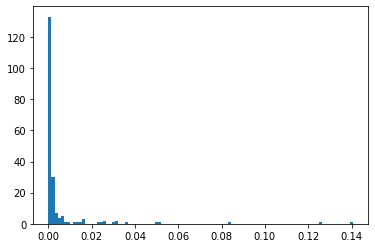

In [28]:
plt.hist(regr.feature_importances_, bins=100)

(array([ 92., 395., 113.,  69.,  57.,  30.,  30.,  19.,  16.,  28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

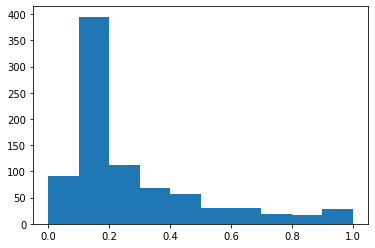

In [37]:
import random
frequencies = set()
sample_raws = set(author_tags.raw)
for motif in motifs:
    frequencies.add(
        sum(1 if motif in text else 0 for text in sample_raws)
        / len(sample_raws))
plt.hist(frequencies)

In [38]:
len(sample_raws)

33292